**<h2> Projeto Web-Scraping Dados da Libertadores Wikipedia </h2>**

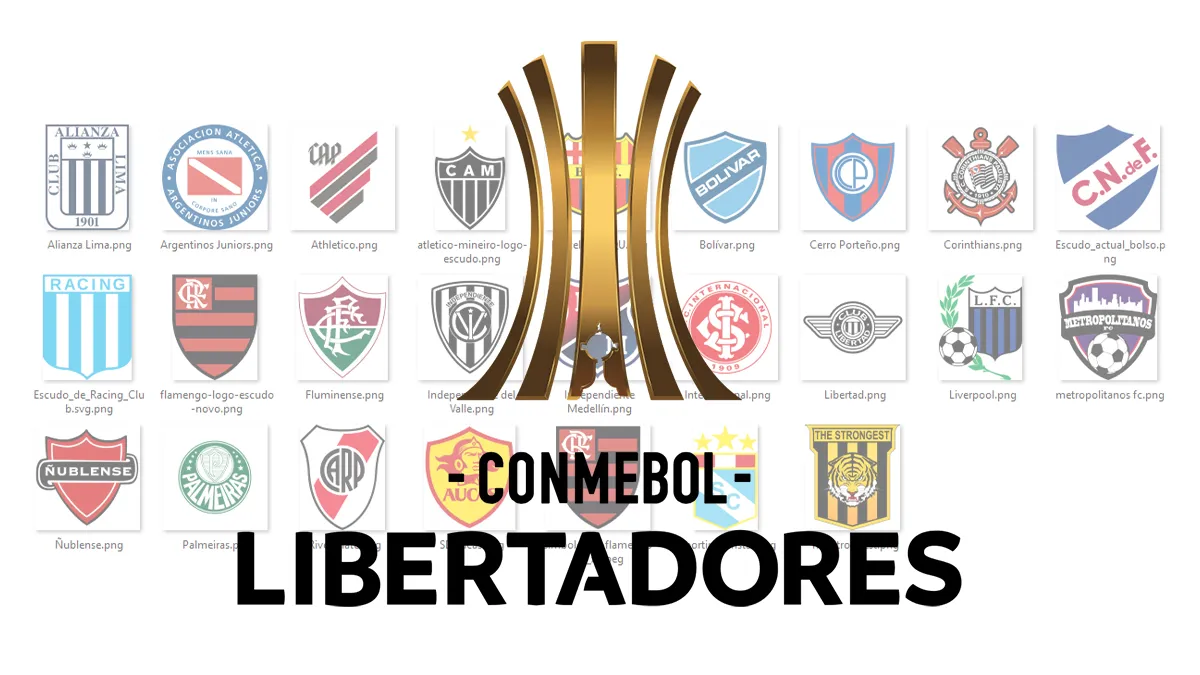

A ideia do projeto é realizar web-scraping com dados das tabelas do libertadores presentes na página do wikipedia sobre a competição.

Separei o projeto em 3 etapas:

1º Extração dos dados

2º Manipulação e Limpeza

3º Criação dos gráficos


**<h2> Raspagem </h2>**

<h3> O código abaixo realizar a raspagem da 1º tabela presente no site utilizando a url e a biblioteca BeatifulSoup. A intenção é pegar dos dados da seguinta tabela presente no site: </h3>

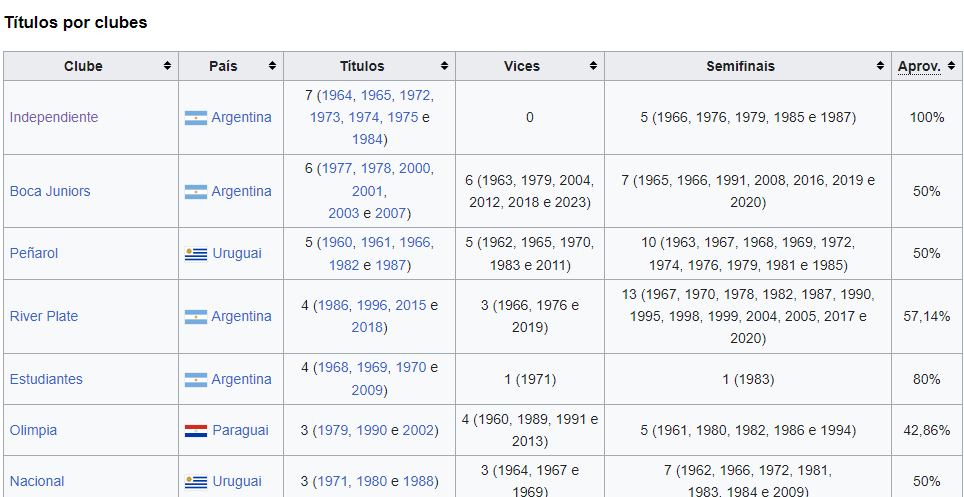

<h2> Antes de começarmos a análise, vou deixar 2 funções prontas para plotar os gráficos. Nesse caso criarei uma função para plotar gráficos de barras horizontais e outra função para plotar gráfico de barras verticais. <h2>

<h2> É importante fazer essa distinção pois adicionar legendas em barras horizontais e verticais tem processos diferentes. </h2>

**Função para gráfico de barras verticais(bar)**

In [59]:
def grafico_barras(tabela, x, y):
  ax = tabela.plot.bar(x=x, y=y)

  # Adicionando rótulos
  for i in ax.patches:
      plt.text(i.get_x() + i.get_width() / 2., i.get_height(), str(round(i.get_height(), 2)), ha='center', va='bottom')

  plt.show()

**Função para gráfico de barras horizontais(barh)**

In [94]:
def barra_horizontal(tabela, x, y):
   # Ordenando as tabelas, isso é importante para o gráfico horizontal
    tabela_ordenada = tabela.sort_values(y)
    ax = tabela_ordenada.reset_index().plot.barh(x=x, y=y)

    # Adicionando rótulos
    for i in ax.patches:
        plt.text(i.get_width() -6.5, i.get_y()+ 0.2, str(round(i.get_width(), 2)))

    plt.show()

In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL da página da Wikipedia com as tabelas da Libertadores
url = "https://pt.wikipedia.org/wiki/Copa_Libertadores_da_Am%C3%A9rica"

# Fazendo a requisição para a URL
response = requests.get(url)

# Criando o objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando a tabela no HTML com a classe desejada
table = soup.find('table', {'class': 'wikitable sortable'})

# Aqui eu pego as infomações em html da 1º tabela
tabela_wiki = pd.read_html(str(table))[0]

**<h3>Já com as informações em mãos, eu transformo os dados em um dataframe para realizar as manipulações e o gráficos necessários.</h3>**

**<h3> Agora eu posso visualizar o dataframe semelhante a tabela do wikipedia </h3>**

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

page = requests.get('https://pt.wikipedia.org/wiki/Copa_Libertadores_da_Am%C3%A9rica').text
soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table', class_='wikitable sortable')

df = pd.read_html(str(table))[0]
tabela_wiki = pd.DataFrame(df)
tabela_wiki.head(17)


,Clube,País,Títulos,Vices,Semifinais,Aprov.
0,Independiente,Argentina,"7 (1964, 1965, 1972, 1973, 1974, 1975 e 1984)",0,"5 (1966, 1976, 1979, 1985 e 1987)",100%
1,Boca Juniors,Argentina,"6 (1977, 1978, 2000, 2001, 2003 e 2007)","6 (1963, 1979, 2004, 2012, 2018 e 2023)","7 (1965, 1966, 1991, 2008, 2016, 2019 e 2020)",50%
2,Peñarol,Uruguai,"5 (1960, 1961, 1966, 1982 e 1987)","5 (1962, 1965, 1970, 1983 e 2011)","10 (1963, 1967, 1968, 1969, 1972, 1974, 1976,...",50%
3,River Plate,Argentina,"4 (1986, 1996, 2015 e 2018)","3 (1966, 1976 e 2019)","13 (1967, 1970, 1978, 1982, 1987, 1990, 1995, ...","57,14%"
4,Estudiantes,Argentina,"4 (1968, 1969, 1970 e 2009)",1 (1971),1 (1983),80%
5,Olimpia,Paraguai,"3 (1979, 1990 e 2002)","4 (1960, 1989, 1991 e 2013)","5 (1961, 1980, 1982, 1986 e 1994)","42,86%"
6,Nacional,Uruguai,"3 (1971, 1980 e 1988)","3 (1964, 1967 e 1969)","7 (1962, 1966, 1972, 1981, 1983, 1984 e 2009)",50%
7,Palmeiras,Brasil,"3 (1999, 2020 e 2021)","3 (1961, 1968 e 2000)","5 (1971, 2001, 2018, 2022 e 2023)",50%
8,São Paulo,Brasil,"3 (1992, 1993 e 2005)","3 (1974, 1994 e 2006)","4 (1972, 2004, 2010 e 2016)",50%
9,Grêmio,Brasil,"3 (1983, 1995 e 2017)",2 (1984 e 2007),"5 (1996, 2002, 2009, 2018 e 2019)",60%


<h3> Agora vem uma parte muito importante. Podemos observar que na coluna títulos temos os valores que cada time conquistou junto dos anos em parenteses. O problema que não é possível realizar gráficos assim, já que está em formato de string a coluna de títulos. </h3>


<h3> Para isso é necessário limpar os parenteses da coluna e transformar em float para ser um dados numerico. A função remove_parentheses tem esse objetivo. </h3>

In [9]:
import re
# Função para remover o que está entre parênteses e converter para float
remove_parentheses = lambda s: float(re.sub(r'\([^)]*\)', '', s))
# Lendo novamente podemos perceber que os parenteses sumiram e podemos criar o gráfico agora
tabela_wiki["Títulos"] = tabela_wiki["Títulos"].apply(remove_parentheses)
tabela_wiki.head(10)

,Clube,País,Títulos,Vices,Semifinais,Aprov.
0,Independiente,Argentina,7.0,0,"5 (1966, 1976, 1979, 1985 e 1987)",100%
1,Boca Juniors,Argentina,6.0,"6 (1963, 1979, 2004, 2012, 2018 e 2023)","7 (1965, 1966, 1991, 2008, 2016, 2019 e 2020)",50%
2,Peñarol,Uruguai,5.0,"5 (1962, 1965, 1970, 1983 e 2011)","10 (1963, 1967, 1968, 1969, 1972, 1974, 1976,...",50%
3,River Plate,Argentina,4.0,"3 (1966, 1976 e 2019)","13 (1967, 1970, 1978, 1982, 1987, 1990, 1995, ...","57,14%"
4,Estudiantes,Argentina,4.0,1 (1971),1 (1983),80%
5,Olimpia,Paraguai,3.0,"4 (1960, 1989, 1991 e 2013)","5 (1961, 1980, 1982, 1986 e 1994)","42,86%"
6,Nacional,Uruguai,3.0,"3 (1964, 1967 e 1969)","7 (1962, 1966, 1972, 1981, 1983, 1984 e 2009)",50%
7,Palmeiras,Brasil,3.0,"3 (1961, 1968 e 2000)","5 (1971, 2001, 2018, 2022 e 2023)",50%
8,São Paulo,Brasil,3.0,"3 (1974, 1994 e 2006)","4 (1972, 2004, 2010 e 2016)",50%
9,Grêmio,Brasil,3.0,2 (1984 e 2007),"5 (1996, 2002, 2009, 2018 e 2019)",60%


<h3> Agora estamos próximos de criar os gráficos, para isso criei um novo dataframe apenas com as informações do Clube e Títulos para plotar. Escolhi o head(17) para pegar os 17 primeiros clubes com mais títulos, para incluir o Fluminense último campeão. </h3>

In [10]:
# Criando um dataframe novo com os dados dos clubes e titulos
top_17_winners = tabela_wiki[["Clube", "Títulos"]].head(17)
top_17_winners

,Clube,Títulos
0,Independiente,7.0
1,Boca Juniors,6.0
2,Peñarol,5.0
3,River Plate,4.0
4,Estudiantes,4.0
5,Olimpia,3.0
6,Nacional,3.0
7,Palmeiras,3.0
8,São Paulo,3.0
9,Grêmio,3.0


**Criando o gráfico de barras para visualizarmos os times que mais vencerão a competição. Podemos ver que indepiende da Argentina venceu incrível 7x**



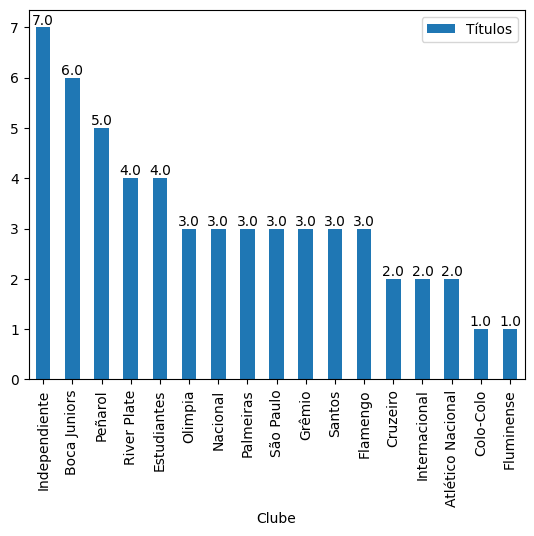

In [61]:
grafico_barras(top_17_winners,'Clube','Títulos')

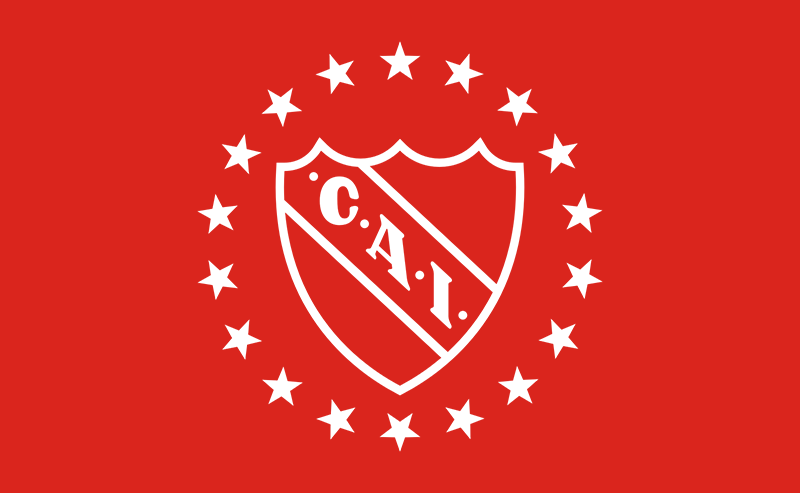

<h3> Agora realizei um filtro para pegar apenas os clubes brasileiros e comparar a quantidade de títulos de cada clube. Vamos ver quem tem mais!</h3>

In [12]:
top_Brasil = tabela_wiki.loc[(df['País'] == 'Brasil') & (df["Títulos"]>= 1)]
top_Brasil

,Clube,País,Títulos,Vices,Semifinais,Aprov.
7,Palmeiras,Brasil,3.0,"3 (1961, 1968 e 2000)","5 (1971, 2001, 2018, 2022 e 2023)",50%
8,São Paulo,Brasil,3.0,"3 (1974, 1994 e 2006)","4 (1972, 2004, 2010 e 2016)",50%
9,Grêmio,Brasil,3.0,2 (1984 e 2007),"5 (1996, 2002, 2009, 2018 e 2019)",60%
10,Santos,Brasil,3.0,2 (2003 e 2020),"4 (1964, 1965, 2007 e 2012)",60%
11,Flamengo,Brasil,3.0,1 (2021),2 (1982 e 1984),75%
12,Cruzeiro,Brasil,2.0,2 (1977 e 2009),2 (1967 e 1975),50%
13,Internacional,Brasil,2.0,1 (1980),"4 (1977, 1989, 2015 e 2023)","66,67%"
16,Fluminense,Brasil,1.0,1 (2008),0,50%
21,Atlético Mineiro,Brasil,1.0,0,2 (1978 e 2021),100%
23,Corinthians,Brasil,1.0,0,1 (2000),100%


**Criando o gráfico de barras para saber quem tem mais títulos dos clubes brasileiros**

**Entre os brasileiros temos 5 times com 3 conquitas: Palmeiras, Santos, Flamengo, Grêmio e São Paulo.**

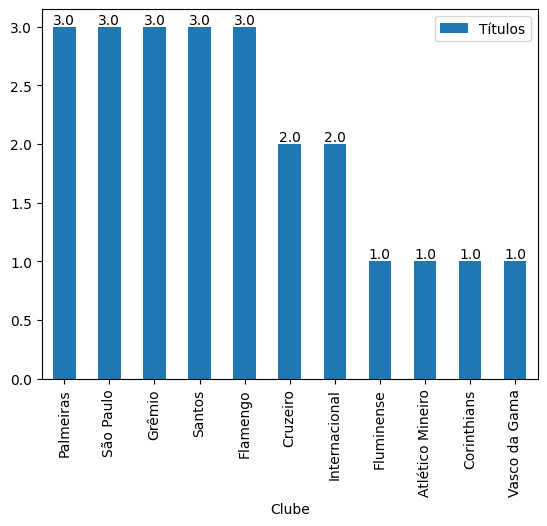

In [80]:
grafico_barras(top_Brasil,'Clube','Títulos')

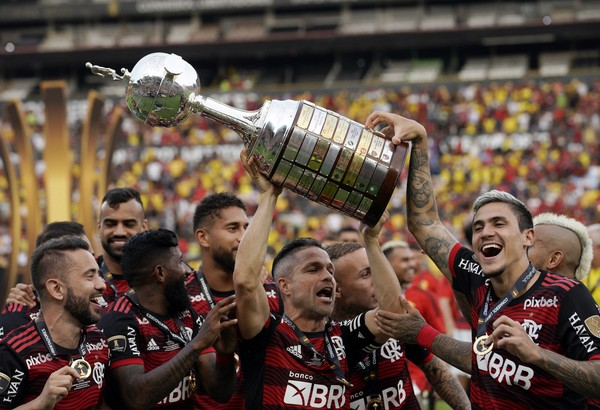

<h3> Agora irei agrupar entre títulos e país para descobrir qual país ganhou mais a competição. Infelizmente é a Argentina.</h3>

<h3> Como irei agrupar, precisarei utilizar o groupby e uma função que nesse caso será o sum(), já que quero saber o total. </h3>

In [96]:
agrupando_pais = tabela_wiki.groupby('País')['Títulos'].sum()
ordenado_agrupando_pais = agrupando_pais.sort_values(ascending=False)

**Criando o gráfico com os países com mais títulos:**

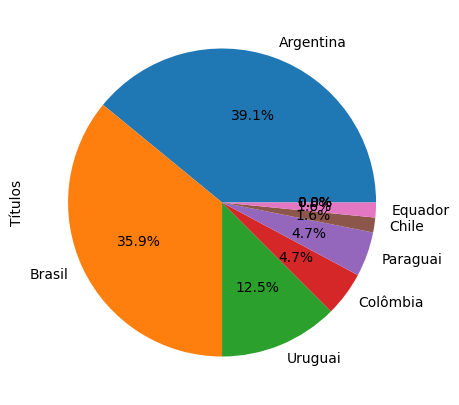

In [104]:
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
ordenado_agrupando_pais.plot(kind='pie', autopct='%1.1f%%')
plt.show()

**O resultado ficou parecido com a tabela abaixo. Eu poderia ter pego essa tabela e ter realizado o gráfico com as colunas País e Títulos. Mas optei fazer por groupby:**


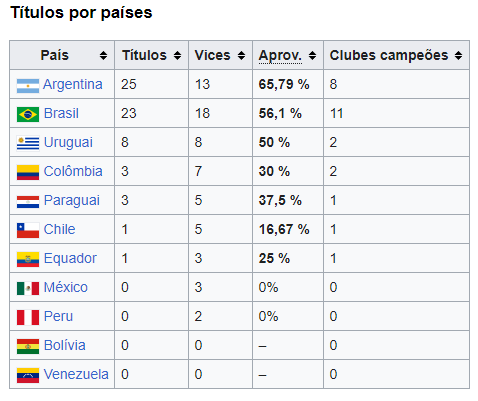

**Agora irei pegar os dados da 3º tabela presente no site do wikipedia para realizar 2 análises:**

* 1º Times brasileiros com **mais participações**;
* 2º Times brasileiros com **mais vitórias**.

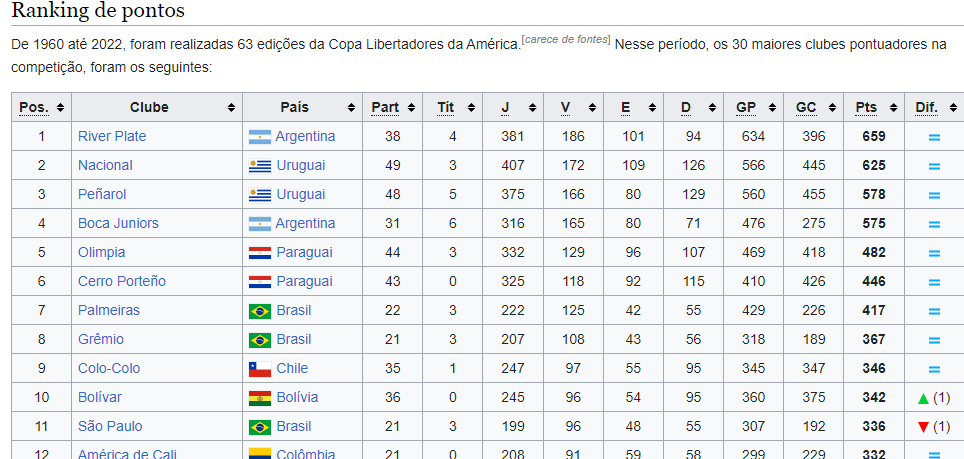

<h3> Raspando os dados da tabela sobre ranking de pontos para retirar as informações que preciso para analisar os times com mais vitórias e participações </h3>

In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


page = requests.get('https://pt.wikipedia.org/wiki/Copa_Libertadores_da_Am%C3%A9rica').text
soup = BeautifulSoup(page, 'html.parser')
table = soup.find_all('table', class_='wikitable sortable')

df = pd.read_html(str(table))[3]
tabela_participações = pd.DataFrame(df)
tabela_participações
# df.to_csv("elections.csv", index=False)

,Pos.,Clube,País,Part,Tít,J,V,E,D,GP,GC,Pts,Dif.
0,1,River Plate,Argentina,38,4,381,186,101,94,634,396,659,NaN
1,2,Nacional,Uruguai,49,3,407,172,109,126,566,445,625,NaN
2,3,Peñarol,Uruguai,48,5,375,166,80,129,560,455,578,NaN
3,4,Boca Juniors,Argentina,31,6,316,165,80,71,476,275,575,NaN
4,5,Olimpia,Paraguai,44,3,332,129,96,107,469,418,482,NaN
5,6,Cerro Porteño,Paraguai,43,0,325,118,92,115,410,426,446,NaN
6,7,Palmeiras,Brasil,22,3,222,125,42,55,429,226,417,NaN
7,8,Grêmio,Brasil,21,3,207,108,43,56,318,189,367,NaN
8,9,Colo-Colo,Chile,35,1,247,97,55,95,345,347,346,NaN
9,10,Bolívar,Bolívia,36,0,245,96,54,95,360,375,342,(1)


**Filtrando o país como Brasil para apenas selecionar os times brasileiros**

In [14]:
tabela_participações_Br = tabela_participações[tabela_participações["País"] == "Brasil"]
tabela_participações_Br

,Pos.,Clube,País,Part,Tít,J,V,E,D,GP,GC,Pts,Dif.
6,7,Palmeiras,Brasil,22,3,222,125,42,55,429,226,417,NaN
7,8,Grêmio,Brasil,21,3,207,108,43,56,318,189,367,NaN
10,11,São Paulo,Brasil,21,3,199,96,48,55,307,192,336,(1)
13,14,Cruzeiro,Brasil,17,2,166,95,32,39,307,158,317,NaN
14,15,Flamengo,Brasil,18,3,162,93,33,36,316,179,312,(4)
16,17,Santos,Brasil,16,3,153,83,32,38,287,173,281,(1)
25,26,Internacional,Brasil,14,2,140,67,39,34,202,124,240,(3)
26,27,Corinthians,Brasil,16,1,132,66,32,34,216,127,230,(1)


**Criando o gráfico para visualizarmos quais times mais participaram**

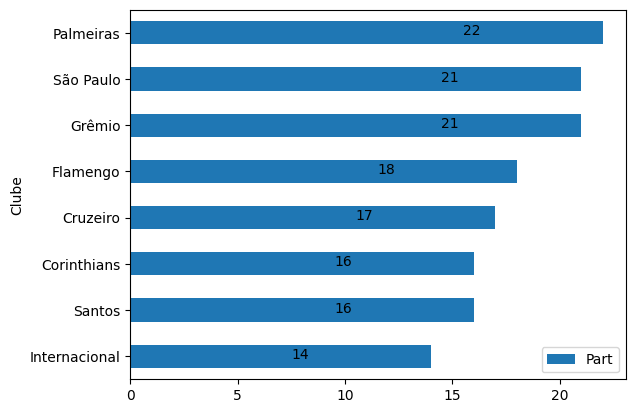

In [92]:
barra_horizontal(tabela_participações_Br,'Clube','Part')

**Com o dataframe tabela_participações_brirei ordenar os times brasileiros com mais vitórias, para isso é só acessar a coluna V presente no dataframe**

In [24]:
Br_ordenado_vitorias = tabela_participações_Br.sort_values('V')
Br_ordenado_vitorias[["Clube","V"]].sort_values(by="V",ascending=False)

,Clube,V
6,Palmeiras,125
7,Grêmio,108
10,São Paulo,96
13,Cruzeiro,95
14,Flamengo,93
16,Santos,83
25,Internacional,67
26,Corinthians,66


**Criando o gráfico para visualizar os times brasileiros mais vitoriosos**

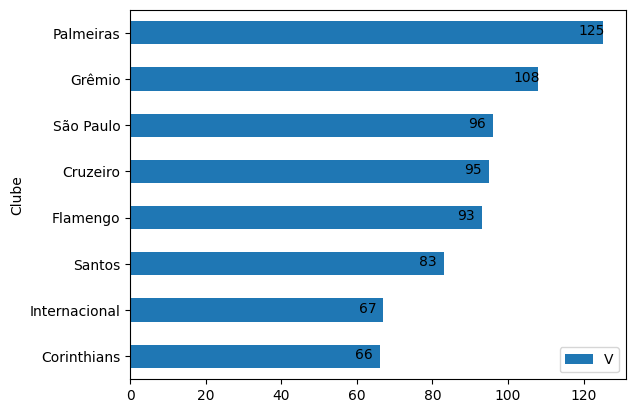

In [93]:
barra_horizontal(tabela_participações_Br,"Clube", "V")